# Conerts Data Analysis


<h1 style= "font-family: Ariel-Sans-Serif ;color:mediumaquamarine; font-weight:bolder">About the data:</h1>

### Source
Publisher: Unknown
Author: Unknown

### Metadata

The dataset contains records about tours by various artists, number of shows per tour and their gross profit.

Example Record: 1	1	2	$780,000,000	$780,000,000	Taylor Swift	The Eras Tour †	2023–2024	56	$13,928,571	[1]

Columns: The column structure of the data appears to be like this:

- Rank: The order of the tour based on its total earnings.
- Peak: The highest rank the tour achieved at any time.
- All Time Peak: The best rank the artist has ever reached across all their tours.
- Actual Gross: The total revenue generated by the tour in real dollars.
- Adjusted Gross: The total revenue adjusted for inflation, making it easier to compare with other tours.
- Artist: The name of the performer.
- Tour Title: The name of the concert tour.
- Year(s): The years during which the tour took place.
- Shows: The total number of concerts performed during the tour.
- Average Gross: The average revenue generated per concert.
- Ref.: References or notes providing additional information about the data.


## Notebook Author

### About 

I am Minhaj Ur Riyan, a passionate data analyst with a strong interest in data visualization and machine learning. With over 2 years of experience in the field of technology, I strive to combine creativity and analytical thinking in my work. My goal is to uncover insights that drive decision-making and innovation.

## Reason for Analysis:
*Peactice task*

# EDA

## Importing Libraries

In [5]:
pip install skimpy

  Using cached skimpy-0.0.15-py3-none-any.whl.metadata (28 kB)
  Using cached polars-0.20.31-cp38-abi3-win_amd64.whl.metadata (14 kB)
  Using cached typeguard-4.2.1-py3-none-any.whl.metadata (3.7 kB)
Using cached skimpy-0.0.15-py3-none-any.whl (16 kB)
Using cached typeguard-4.2.1-py3-none-any.whl (34 kB)
Using cached polars-0.20.31-cp38-abi3-win_amd64.whl (28.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from skimpy import skim

In [8]:
# Import the data
path = r'C:\Users\riyan\OneDrive\Desktop\EDA\Concerts Analysis\data\\'
df = pd.read_csv(path + 'Concerts Uncleaned.csv') 

### 2. Information about the dataset

In [10]:
# Lets print the first 5 rows
df.head(3)

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]


In [12]:
# shape of the data
df.shape

(20, 11)

In [13]:
# data attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Rank                              20 non-null     int64 
 1   Peak                              9 non-null      object
 2   All Time Peak                     6 non-null      object
 3   Actual gross                      20 non-null     object
 4   Adjusted gross (in 2022 dollars)  20 non-null     object
 5   Artist                            20 non-null     object
 6   Tour title                        20 non-null     object
 7   Year(s)                           20 non-null     object
 8   Shows                             20 non-null     int64 
 9   Average gross                     20 non-null     object
 10  Ref.                              20 non-null     object
dtypes: int64(2), object(9)
memory usage: 1.8+ KB


In [14]:
# data description
df.describe()

,Rank,Shows
count,20.000000,20.000000
mean,10.450000,110.000000
std,5.942488,66.507617
min,1.000000,41.000000
25%,5.750000,59.000000
50%,10.500000,87.000000
75%,15.250000,134.500000
max,20.000000,325.000000


In [15]:
# A lot of features should be of numeric format but they are not

# Lets check the data types
df.dtypes

Rank                                 int64
Peak                                object
All Time Peak                       object
Actual gross                        object
Adjusted gross (in 2022 dollars)    object
Artist                              object
Tour title                          object
Year(s)                             object
Shows                                int64
Average gross                       object
Ref.                                object
dtype: object

### Key Observations
- The data consists of 20 records and 11 features.
- Peak, All Time Peak, Actual gross, Adjusted gross, Years and Shows 
are of 'o' type but should be numeric.
- Peak and All Time Peak seems to have a lot of missing data.
- Nothing much can be done without some feature engineering.
- 'Ref.' column seems to be of no use to our analysis.

### Next Steps: 
1. Feature Engineering.
2. Data Preprocessing.
3. Analysis and Visualization.

---

### 3. Necessary Feature Engineering:

In [16]:
# Data types
df.dtypes

Rank                                 int64
Peak                                object
All Time Peak                       object
Actual gross                        object
Adjusted gross (in 2022 dollars)    object
Artist                              object
Tour title                          object
Year(s)                             object
Shows                                int64
Average gross                       object
Ref.                                object
dtype: object

In [17]:
# First lets drop the 'Ref.' column
df.drop('Ref.', axis = 1, inplace = True)

In [24]:
# As for the 'Peak', 'All Time Peak' columns we seem to have references or footnotes
# Along with the values of peaks.

# Lets remove the footnotes
# We can simply use string slicing 
df['Peak'] = df['Peak'].str[0]

df['All Time Peak'] = df['All Time Peak'].str[0]

# Alternatively we can use regular expressions or replace with r string
# df['Peak'] = df['Peak'].str.replace(r'\[.*\]', '')

In [36]:
# Replace currency sign with empty string

df['Actual gross'] = df['Actual gross'].str.replace('$', '')
df['Adjusted gross (in 2022 dollars)'] = df['Adjusted gross (in 2022 dollars)'].str.replace('$', '')
df['Average gross'] = df['Average gross'].str.replace('$', '')

KeyError: 'Actual gross'

In [37]:
# Above error suggests we have some error with the column names
# Lets try to strip the whitespaces
df.columns = df.columns.str.strip()
print("Column names:", df.columns)


Column names: Index(['Rank', 'Peak', 'All Time Peak', 'Actual gross',
       'Adjusted gross (in 2022 dollars)', 'Artist', 'Tour title', 'Year(s)',
       'Shows', 'Average gross'],
      dtype='object')


In [40]:
# It still has not fixed the issue
# The column names seems to have some whitespaces that are not regular whitespaces

#Strip whitespace from column names
df.columns = df.columns.str.strip()

# Print the column names to verify
print("Column names:", df.columns.tolist())

# List of columns to convert
col_list = ['Actual gross', 'Adjusted gross (in 2022 dollars)', 'Average gross']

# Check for any issues with column names
missing_cols = [col for col in col_list if col not in df.columns]
if missing_cols:
    print("Missing columns:", missing_cols)
else:
    # Ensure relevant columns are treated as strings
    df[col_list] = df[col_list].astype(str)

    # Replace currency sign with empty string
    df['Actual gross'] = df['Actual gross'].str.replace('$', '', regex=False)
    df['Adjusted gross (in 2022 dollars)'] = df['Adjusted gross (in 2022 dollars)'].str.replace('$', '', regex=False)
    df['Average gross'] = df['Average gross'].str.replace('$', '', regex=False)


Column names: ['Rank', 'Peak', 'All Time Peak', 'Actual\xa0gross', 'Adjusted\xa0gross (in 2022 dollars)', 'Artist', 'Tour title', 'Year(s)', 'Shows', 'Average gross']
Missing columns: ['Actual gross', 'Adjusted gross (in 2022 dollars)']


In [41]:
# Replace non-breaking spaces with regular spaces
df.columns = df.columns.str.replace('\xa0', ' ', regex=False)

In [47]:
# Lets run the code again

# Replace currency sign with empty string

df['Actual gross'] = df['Actual gross'].str.replace('$', '').str.replace(',', '').str.replace(' ','')
df['Adjusted gross (in 2022 dollars)'] = df['Adjusted gross (in 2022 dollars)'].str.replace('$', '').str.replace(',', '').str.replace(' ','')
df['Average gross'] = df['Average gross'].str.replace('$', '').str.replace(',', '').str.replace(' ','')

In [48]:
# Lets analyze some samples
df.sample(3)

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross
5,6,2,1,305158363,388978496,Madonna,The MDNA Tour,2012,88,3467709
8,9,NaN,NaN,256084556,312258401,Beyoncé,The Formation World Tour,2016,49,5226215
1,2,1,7,579800000,579800000,Beyoncé,Renaissance World Tour,2023,56,10353571


In [44]:
df.columns

Index(['Rank', 'Peak', 'All Time Peak', 'Actual gross',
       'Adjusted gross (in 2022 dollars)', 'Artist', 'Tour title', 'Year(s)',
       'Shows', 'Average gross'],
      dtype='object')

In [49]:
# Datatype formatting

col_list = ['Peak', 'All Time Peak', 'Actual gross',
       'Adjusted gross (in 2022 dollars)',
       'Shows', 'Average gross']

df[col_list] = df[col_list].astype('float')

ValueError: could not convert string to float: '229100000[b]'

In [70]:
# Lets analyze the anomaly
for i in range (len(df['Actual gross'])):
    if('[b]' in df['Actual gross'][i] or '[e]' in df['Actual gross'][i]):
        print(df['Actual gross'][i])
    else:
        pass


229100000[b]
167700000[e]


In [77]:
# These two points seem to be causing the issue
df['Actual gross'] = df['Actual gross'].str.replace(r'\[.*?\]', '', regex=True)

In [78]:
# Lets analyze the anomaly
for i in range (len(df['Actual gross'])):
    if('[b]' in df['Actual gross'][i] or '[e]' in df['Actual gross'][i]):
        print(df['Actual gross'][i])
    else:
        pass


In [102]:
# Datatype formatting

col_list = ['Peak', 'All Time Peak', 'Actual gross',
       'Adjusted gross (in 2022 dollars)',
       'Shows', 'Average gross']

df[col_list] = df[col_list].astype('float')

In [80]:
df.dtypes

Rank                                  int64
Peak                                float64
All Time Peak                       float64
Actual gross                        float64
Adjusted gross (in 2022 dollars)    float64
Artist                               object
Tour title                           object
Year(s)                              object
Shows                               float64
Average gross                       float64
dtype: object

In [81]:
df.head(3)

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross
0,1,1.0,2.0,780000000.0,780000000.0,Taylor Swift,The Eras Tour †,2023–2024,56.0,13928571.0
1,2,1.0,7.0,579800000.0,579800000.0,Beyoncé,Renaissance World Tour,2023,56.0,10353571.0
2,3,1.0,2.0,411000000.0,560622615.0,Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85.0,4835294.0


In [88]:
# Extracting cocert start and end from Year(s)
df['Start Year'] = df['Year(s)'].str.split('–').str[0]

df['End Year'] = df['Year(s)'].str.split('–').str[1]


In [90]:
df.head(3)

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Start Year,End Year
0,1,1.0,2.0,780000000.0,780000000.0,Taylor Swift,The Eras Tour †,2023–2024,56.0,13928571.0,2023,2024
1,2,1.0,7.0,579800000.0,579800000.0,Beyoncé,Renaissance World Tour,2023,56.0,10353571.0,2023,NaN
2,3,1.0,2.0,411000000.0,560622615.0,Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85.0,4835294.0,2008,2009


In [91]:
# If the end year is NaN then it is the same as the start year
df['End Year'] = df['End Year'].fillna(df['Start Year'])

In [93]:
df[['Start Year', 'End Year']] = df[['Start Year', 'End Year']].astype('int')

In [95]:
# Lets drop the 'Year(s)' column
df.drop('Year(s)', axis = 1, inplace = True)

In [96]:
df.dtypes

Rank                                  int64
Peak                                float64
All Time Peak                       float64
Actual gross                        float64
Adjusted gross (in 2022 dollars)    float64
Artist                               object
Tour title                           object
Shows                               float64
Average gross                       float64
Start Year                            int32
End Year                              int32
dtype: object

### What is done so far
- Unnecessary chars have been removed
- Type casting on numeric columns
- Taken care of some data anomalies

### Next Steps:
- Clean the data if possible
- Understand the correlation between variables

### 4. Data Preprocessing

#### 4.1 Data cleaning

In [97]:
# Lets see the missing values
df.isnull().sum()

Rank                                 0
Peak                                11
All Time Peak                       14
Actual gross                         0
Adjusted gross (in 2022 dollars)     0
Artist                               0
Tour title                           0
Shows                                0
Average gross                        0
Start Year                           0
End Year                             0
dtype: int64

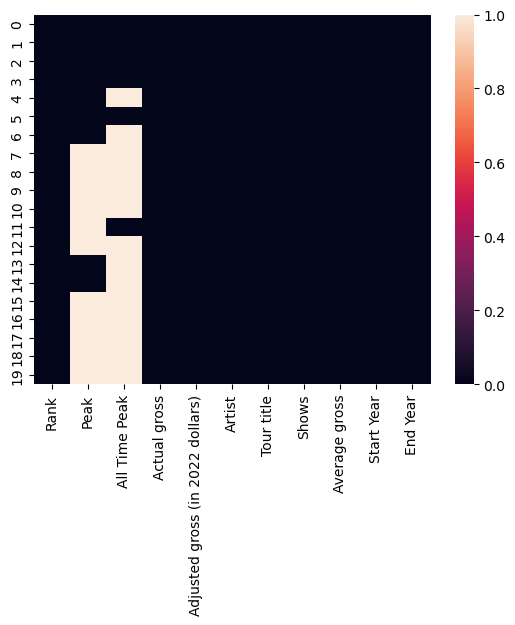

In [99]:
sns.heatmap(df.isnull())
plt.show()

In [100]:
# Missing value percentage
df.isnull().sum()/len(df) * 100

Rank                                 0.0
Peak                                55.0
All Time Peak                       70.0
Actual gross                         0.0
Adjusted gross (in 2022 dollars)     0.0
Artist                               0.0
Tour title                           0.0
Shows                                0.0
Average gross                        0.0
Start Year                           0.0
End Year                             0.0
dtype: float64

---
> 'Peak' and 'All Time Peak' have enormous amounts of NaN values, trying to impute them
> will distort our data even if we use ML regreession models it would be time consuming and may not preserce the original correlation.
---

Data looks clean and requires no further preprocessing. 
We won't use Peak and All Time Peak in our Analysis.

### 5. Data Analysis

In [104]:
# Observing the correlation

corr_matrix = df[col_list].corr()
corr_matrix

,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Shows,Average gross
Peak,1.000000,-0.581914,-0.526314,-0.578370,-0.197883,-0.470614
All Time Peak,-0.581914,1.000000,0.456520,0.372905,-0.549290,0.556159
Actual gross,-0.526314,0.456520,1.000000,0.972000,-0.305908,0.899649
Adjusted gross (in 2022 dollars),-0.578370,0.372905,0.972000,1.000000,-0.227223,0.821066
Shows,-0.197883,-0.549290,-0.305908,-0.227223,1.000000,-0.568995
Average gross,-0.470614,0.556159,0.899649,0.821066,-0.568995,1.000000


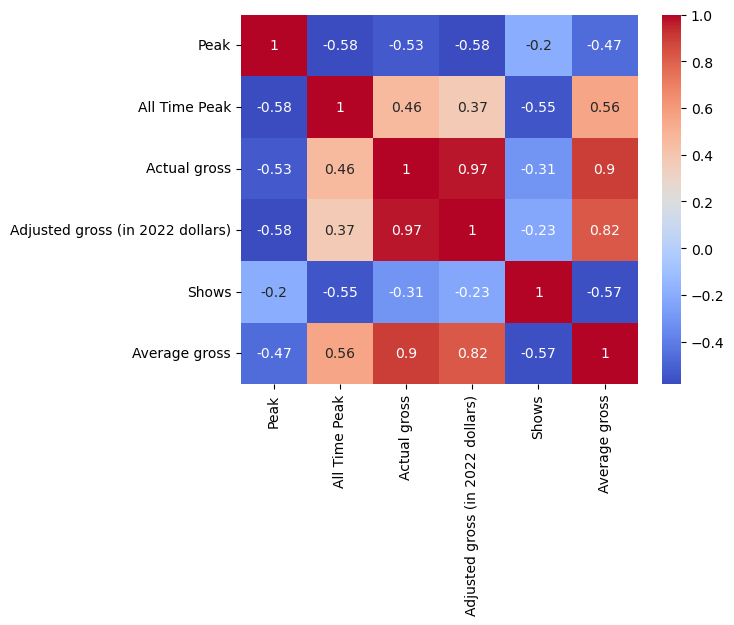

In [106]:
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

### Observation
- Peak and All Time Peak: There is a strong negative correlation of -0.58 between Peak and All Time Peak, indicating that as one increases, the other tends to decrease.
- Gross Revenues:
Actual gross shows a strong positive correlation with Adjusted gross (in 2022 dollars) (0.97), suggesting they move together closely.
Actual gross has a moderate negative correlation with both Peak and All Time Peak (-0.53 and -0.46, respectively), indicating that higher gross does not necessarily align with peak performance metrics.
- Shows:
The number of Shows has a weak negative correlation with most financial metrics, particularly with Peak (-0.2) and All Time Peak (-0.55), suggesting that more shows do not directly lead to higher peak performances.
- Average Gross: Shows a moderately strong positive correlation with both Actual gross (0.9) and Adjusted gross (in 2022 dollars) (0.82), indicating that higher average gross correlates with overall revenue performance.

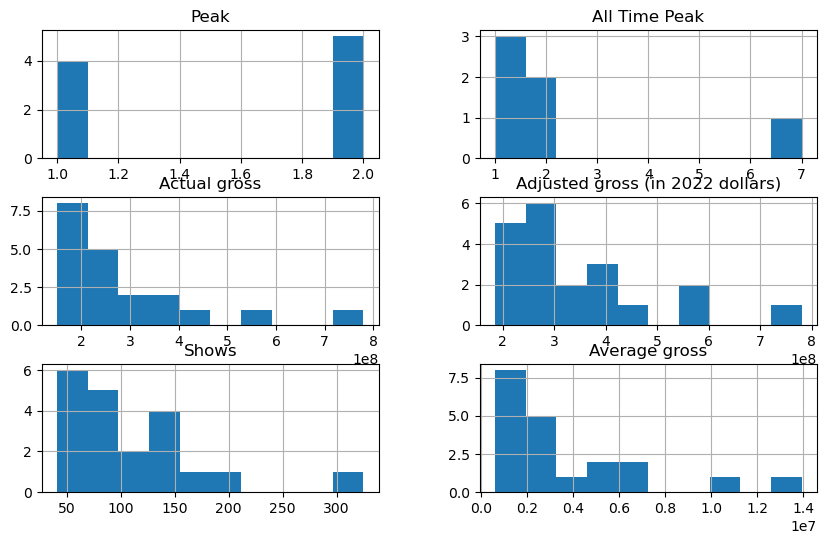

In [115]:
# Distribution of the data
df[col_list].hist(figsize = (10,6))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

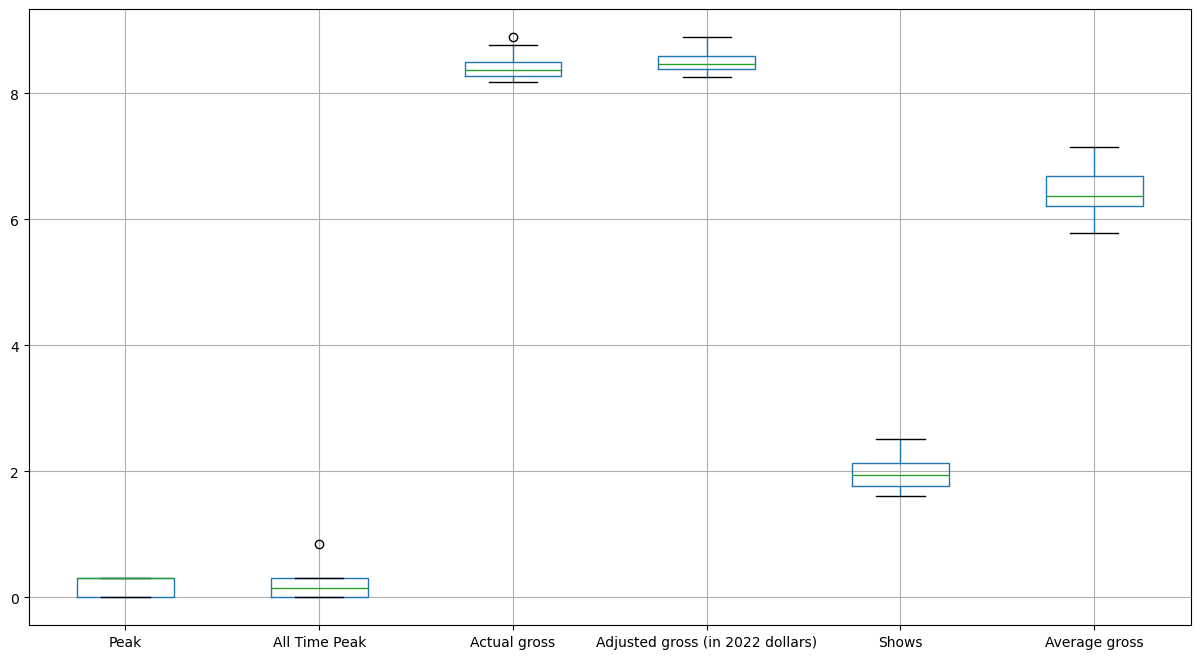

In [116]:
# Using a box plot
np.log10(df[col_list]).boxplot(figsize = (15,8))
plt.show

In [117]:
# Starting off with some basic questions

# What is the most popular artist?
df['Artist'].value_counts()

Artist
Taylor Swift    4
Madonna         4
Beyoncé         3
Pink            3
Lady Gaga       2
Celine Dion     1
Katy Perry      1
Cher            1
Adele           1
Name: count, dtype: int64

<Axes: xlabel='Artist', ylabel='Count'>

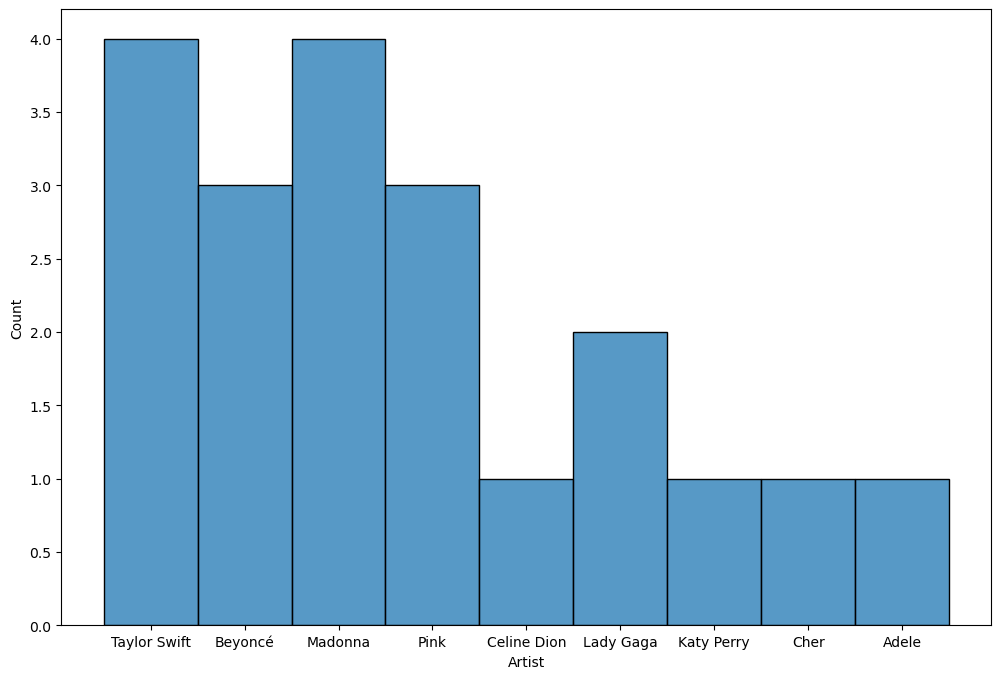

In [123]:
plt.figure(figsize = (12,8))
sns.histplot(df['Artist'])

Taylor Swift and Madona are the artists with most concerts followed by Beyonce and Pink.

In [127]:
df.head()

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Shows,Average gross,Start Year,End Year
0,1,1.0,2.0,780000000.0,780000000.0,Taylor Swift,The Eras Tour †,56.0,13928571.0,2023,2024
1,2,1.0,7.0,579800000.0,579800000.0,Beyoncé,Renaissance World Tour,56.0,10353571.0,2023,2023
2,3,1.0,2.0,411000000.0,560622615.0,Madonna,Sticky & Sweet Tour ‡[4][a],85.0,4835294.0,2008,2009
3,4,2.0,1.0,397300000.0,454751555.0,Pink,Beautiful Trauma World Tour,156.0,2546795.0,2018,2019
4,5,2.0,NaN,345675146.0,402844849.0,Taylor Swift,Reputation Stadium Tour,53.0,6522173.0,2018,2018


In [129]:
# What is the most popular tour?
df.groupby('Tour title')['Average gross'].sum().sort_values(ascending = False)

Tour title
The Eras Tour †                             13928571.0
Renaissance World Tour                      10353571.0
Reputation Stadium Tour                      6522173.0
Summer Carnival †                            6282927.0
The Formation World Tour                     5226215.0
Sticky & Sweet Tour ‡[4][a]                  4835294.0
The MDNA Tour                                3467709.0
Confessions Tour                             3233333.0
The 1989 World Tour                          2945882.0
Beautiful Trauma World Tour                  2546795.0
Taking Chances World Tour                    2137405.0
Rebel Heart Tour                             2070732.0
The Red Tour                                 1744186.0
The Mrs. Carter Show World Tour              1735606.0
Born This Way Ball                           1734694.0
Adele Live 2016                              1385950.0
Prismatic World Tour                         1350993.0
The Truth About Love Tour                    1295775.0

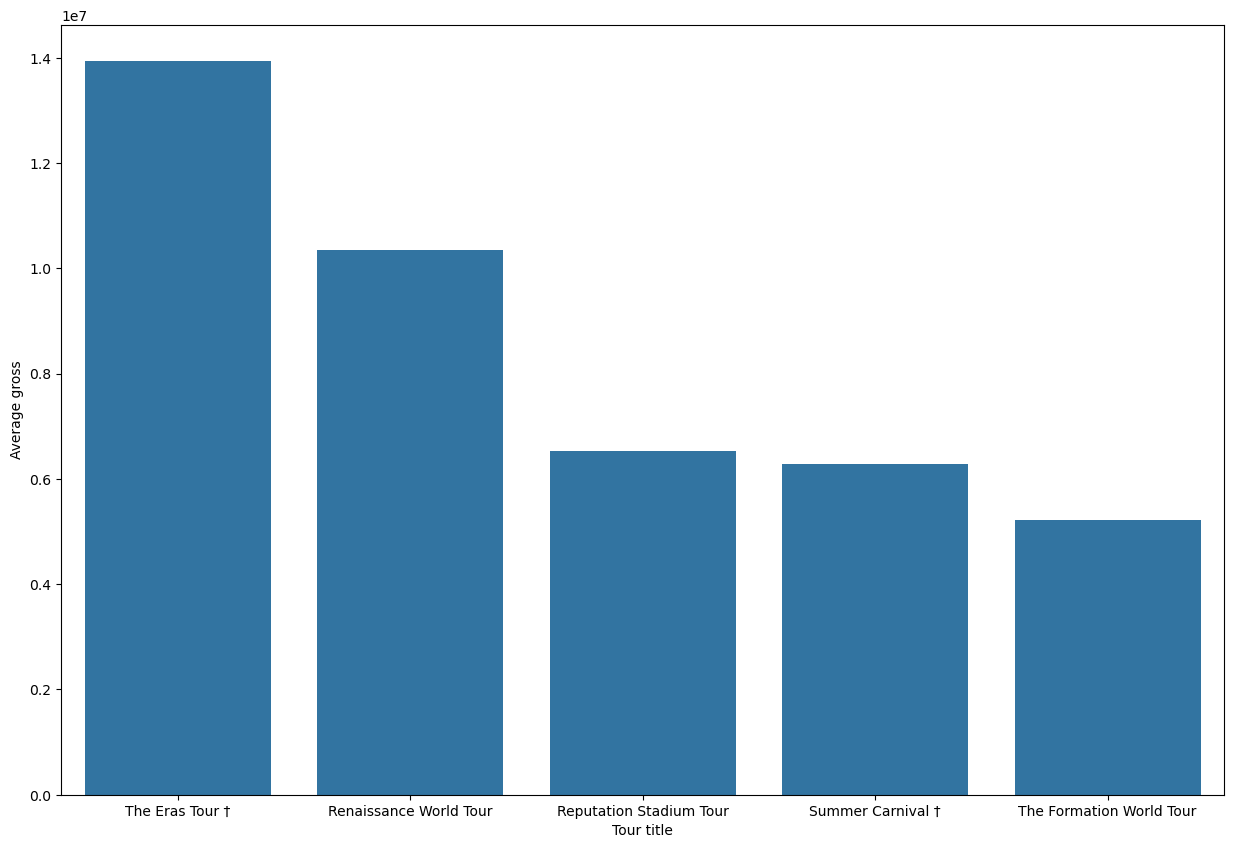

In [135]:
top_tours = df.groupby('Tour title')['Average gross'].sum().sort_values(ascending = False)
plt.figure(figsize = (15,10))
sns.barplot(top_tours.head())
plt.show()


The Eras Tour is the most popular tour maintaining an average gross of over 13 million USD.

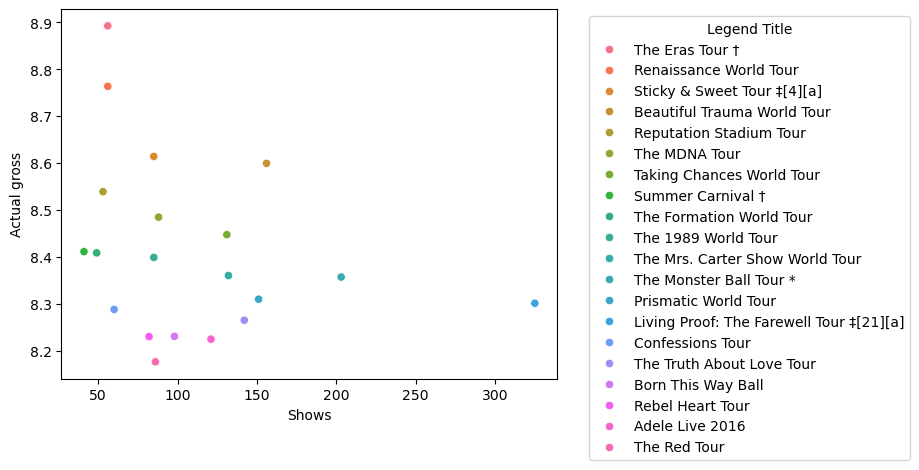

In [138]:
# Do more shows per tour make more money?

# Lets analyze the relatiobship between the number of shows and the Actual gross

sns.scatterplot(df, x= 'Shows', y = np.log10(df['Actual gross']), hue = 'Tour title')
plt.legend(title='Legend Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

As it is clear from the figure that more shows per tour does not necessarily mean a higher gross.

In [139]:
# Which were the most popular years for concerts?

df.groupby('Start Year')['Tour title'].count().sort_values(ascending = False)

Start Year
2013    3
2023    3
2008    2
2012    2
2015    2
2016    2
2018    2
2002    1
2006    1
2009    1
2014    1
Name: Tour title, dtype: int64

<Axes: xlabel='Start Year', ylabel='Shows'>

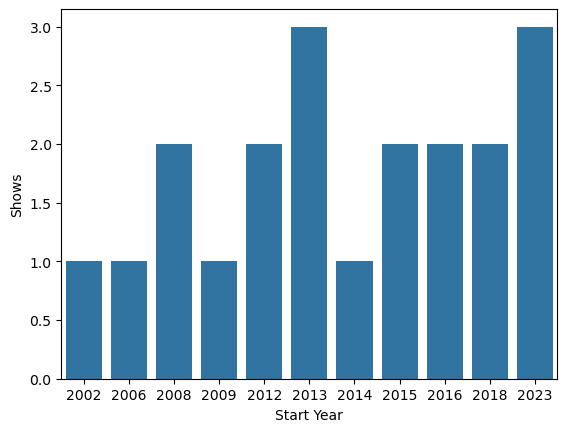

In [150]:
shows_by_year = df.groupby('Start Year')['Shows'].count().sort_values(ascending = False)
sns.barplot(x= shows_by_year.index, y= shows_by_year)

In [152]:
# Do the tours that span more time make more?

#df['Span in years'] = (pd.to_datetime(df['End Year'], format='%Y') - 
                    #   pd.to_datetime(df['Start Year'], format='%Y')).dt.days / 365
#  The division by 365 is to convert days to years

In [156]:
# Span in years in almost useless feature as most of the tours are less than 1 year
# or just over a year in duration
# We will get the difference in months instead

df['Span in months'] = (pd.to_datetime(df['End Year'], format='%Y') - 
                      pd.to_datetime(df['Start Year'], format='%Y')).dt.days / 30.44


In [163]:
# Values with less than 1 month will be treated as less than 12 or just under a year
df['Span in months'] = df['Span in months'].apply(lambda x: x if x > 0 else '<12')

In [165]:
df.sample(3)

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Shows,Average gross,Start Year,End Year,Span in months
9,10,NaN,NaN,250400000.0,309141878.0,Taylor Swift,The 1989 World Tour,85.0,2945882.0,2015,2015,<12
15,16,NaN,NaN,184000000.0,227452347.0,Pink,The Truth About Love Tour,142.0,1295775.0,2013,2014,11.990802
18,19,NaN,NaN,167700000.0,204486106.0,Adele,Adele Live 2016,121.0,1385950.0,2016,2017,12.023653


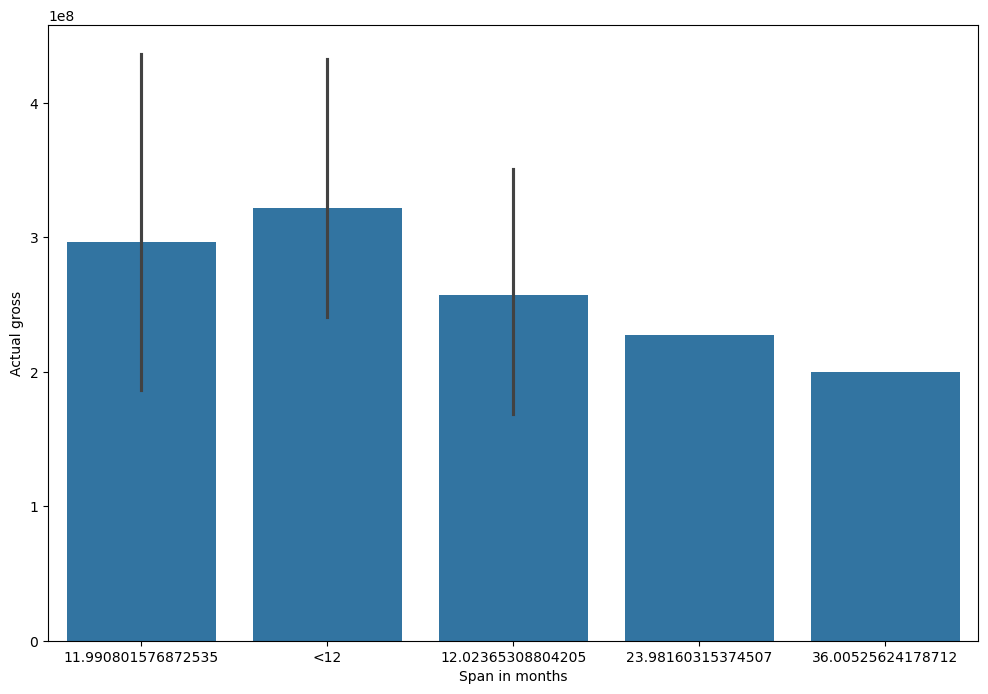

In [173]:
# Lets see what impact does the span in months have
plt.figure(figsize = (12,8))
sns.barplot(df, x= 'Span in months', y = 'Actual gross')
plt.show()

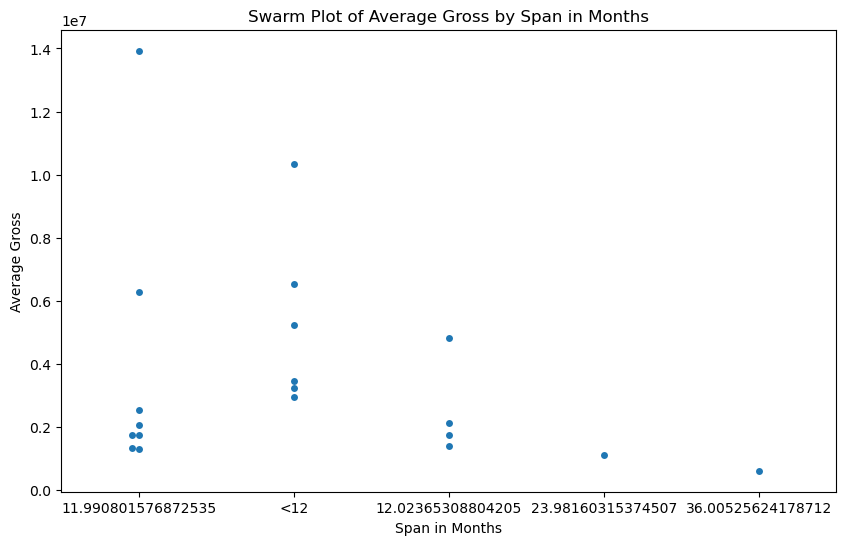

In [172]:
# Swarm plot

plt.figure(figsize=(10, 6))
sns.swarmplot(x='Span in months', y='Average gross', data=df)
plt.title('Swarm Plot of Average Gross by Span in Months')
plt.xlabel('Span in Months')
plt.ylabel('Average Gross')
plt.show()

The span of concerts seems to have a negative correlation with gross value.
Suggesting that the shows that spanned less time grossed more. 
Or it may suggest that some artists are more popular among fans compared to others.

In [174]:
# What artists have the highest average gross?
df.groupby('Artist')['Average gross'].sum().sort_values(ascending = False)

Artist
Taylor Swift    25140812.0
Beyoncé         17315392.0
Madonna         13607068.0
Pink            10125497.0
Lady Gaga        2852921.0
Celine Dion      2137405.0
Adele            1385950.0
Katy Perry       1350993.0
Cher              615385.0
Name: Average gross, dtype: float64

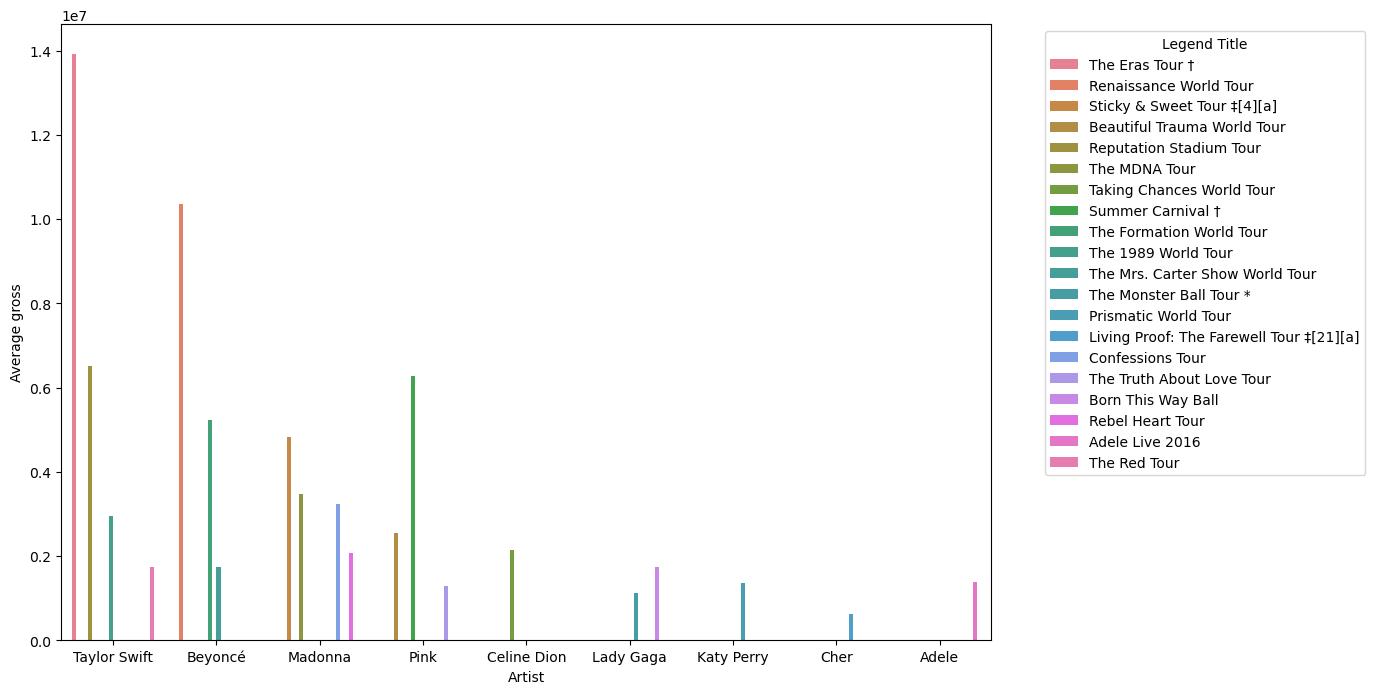

In [177]:
# Lets see if it is due to the fact that the top grossers have more concerts
plt.figure(figsize = (12,8))
sns.barplot(df, x= 'Artist', y = 'Average gross', hue = 'Tour title')
plt.legend(title='Legend Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

As seen in the figure, it holds true for the top artists that they have more tours to their names then the artists that have a low average gross over the years.

## Summary:
*Should contain an overview of the whole EDA summarizing the key findings*